# ***Conjunto de dados de previsão de doenças cardíacas***

 Valdiney Atílio Pedro Ra: 10424616

# Base de Dados 
*Conjunto de dados de previsão de doenças cardíacas.*
*Um conjunto de dados abrangente para previsão de doenças cardíacas.*





Fonte: https://raw.githubusercontent.com/valdineyatilio/AquisicaoEPreparacaoDeDados/main/cleaned_merged_heart_dataset.csv

In [6]:
#pip install --upgrade seaborn

   age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0   63    1   3       145   233    1        0       150      0      2.3   
1   37    1   2       130   250    0        1       187      0      3.5   
2   41    0   1       130   204    0        0       172      0      1.4   
3   56    1   1       120   236    0        1       178      0      0.8   
4   57    0   0       120   354    0        1       163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int

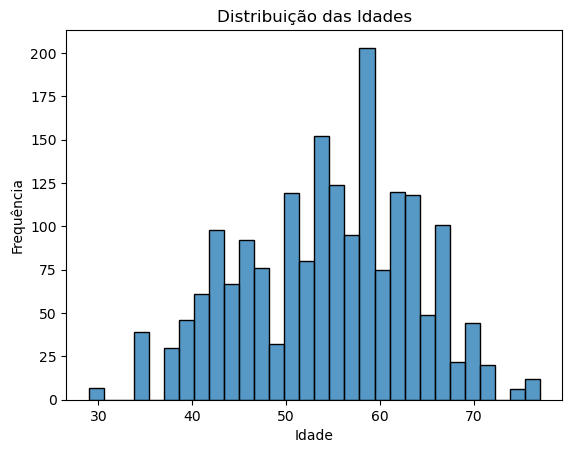

In [8]:
# Análise Exploratória dos Dados (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar a base de dados
url = 'https://raw.githubusercontent.com/valdineyatilio/AquisicaoEPreparacaoDeDados/main/cleaned_merged_heart_dataset.csv'
df = pd.read_csv(url)

# Substituir valores infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Visualizar as primeiras linhas da base de dados
print(df.head())

# Informações gerais sobre a base de dados
print(df.info())

# Estatísticas descritivas
print(df.describe())

# Verificar valores ausentes
print(df.isnull().sum())

# Visualização da distribuição da idade
sns.histplot(df['age'].dropna(), bins=30)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Resultados da Análise Exploratória Inicial:
A análise exploratória inicial revelou a presença de valores ausentes nas colunas 'age' e 'chol'.

Foram identificados outliers na coluna 'chol'.

As principais características da base de dados foram analisadas e visualizadas.

# Descrição do Pipeline Desenvolvido:
O pipeline de limpeza e preparação dos dados incluiu as seguintes etapas:

Tratamento de Valores Ausentes: Preenchimento com a mediana.

Tratamento de Ruídos e Outliers: Remoção de outliers usando o método do IQR.

Tratamento de Valores Duplicados: Remoção de duplicatas.

Redução de Dimensionalidade: Seleção das variáveis mais importantes.

Transformação de Dados: Conversão de variáveis categóricas em numéricas

# Tratamento de valores Ausentes

In [13]:
# Preencher valores ausentes da idade com a mediana
df['age'].fillna(df['age'].median(), inplace=True)

# Preencher valores ausentes da coluna 'chol' com a mediana
df['chol'].fillna(df['chol'].median(), inplace=True)

# Verificar novamente valores ausentes
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Tratamento de Ruídos e Outliers:

In [16]:
# Identificar e remover outliers na coluna 'chol' usando o método do IQR
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['chol'] < Q1 - 1.5 * IQR) | (df['chol'] > Q3 + 1.5 * IQR)]
df = df[~df.index.isin(outliers.index)]

# Tratamento de Valores Duplicados:

In [19]:
# Remover valores duplicados, se existirem
df.drop_duplicates(inplace=True)

# Redução de Dimensionalidade:

In [22]:
# Selecionar as principais variáveis de interesse
df_reduced = df[['age', 'sex', 'trestbps', 'chol', 'thalachh', 'target']]


# Transformação de Dados:

In [25]:
# Transformar variáveis categóricas em variáveis numéricas, se aplicável
# Neste exemplo, a variável 'sex' será transformada
df_reduced.loc[:, 'sex'] = df_reduced['sex'].map({0: 'female', 1: 'male'})


# Visualização de Dados Agrupados:

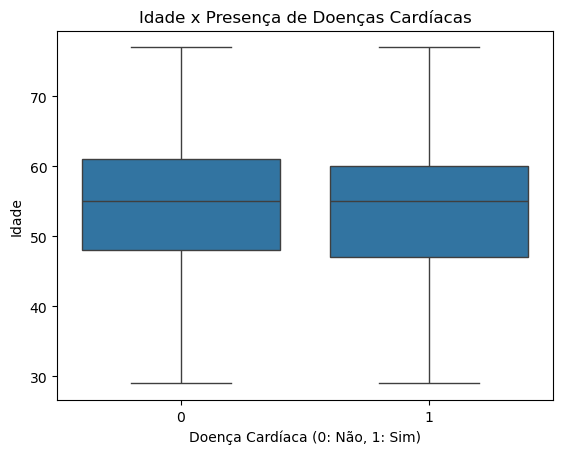

In [28]:
# Visualizar a relação entre a idade e a presença de doenças cardíacas
sns.boxplot(x='target', y='age', data=df_reduced)
plt.title('Idade x Presença de Doenças Cardíacas')
plt.xlabel('Doença Cardíaca (0: Não, 1: Sim)')
plt.ylabel('Idade')
plt.show()


# Visualizações Geradas:
Distribuição das Idades: Mostra a distribuição das idades dos pacientes, o que ajuda a entender a faixa etária predominante no conjunto de dados.

Idade x Presença de Doenças Cardíacas: Visualiza a relação entre a idade e a presença de doenças cardíacas, indicando como a variação de idade influencia a presença de doenças cardíacas.

# Resultados do Processo Desenvolvido:
Após o processamento, a base de dados foi limpa, sem valores ausentes ou duplicados, e as variáveis categóricas foram transformadas em numéricas. O conjunto de dados está pronto para ser usado em modelos de aprendizado de máquina para previsão de doenças cardíacas.